In [335]:
# --- Imports ---
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pickle
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')
pd.set_option('display.max_columns', 200)


In [336]:
# Update path if needed
DATA_PATH = 'marketing_campaign.xlsx'

REF_DATE = pd.to_datetime('2025-10-09')

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}. Upload it to /mnt/data/")

# Load
df = pd.read_excel(DATA_PATH)
print('Initial shape:', df.shape)

Initial shape: (2240, 29)


In [337]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [338]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    23.750000     1.000000   
50%              2013-07-08 12:00:00    49.000000   173.500000     8.000000   
75%              2013-12-30 06:00:00    74.000000   504.250000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.962453   336.597393    39.773434   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count      2240.000000      2240.000000       2240.000000   2240.000000   
mean        166.950000        37.525446         27.062946     44.021875   
min           0.000000         0.000000          0.000000      0.000000   
25%          16.000000         3.000000          1.000000      9.000000   
50%          67.000000        12.000000          8.000000     24.000000   
75%         232.000000        50.000000         33.000000     56.000000   
max        1725.000000       259.000000        263.000000    362.000000   
std         225.715373        54.628979         41.280498     52.167439   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2240.000000      2240.000000          2240.000000   
mean            2.325000         4.084821             2.662054   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   
std             1.932238         2.778714             2.923101   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2240.000000        2240.000000   2240.000000   2240.000000   
mean            5.790179           5.316518      0.072768      0.074554   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   
std             3.250958           2.426645      0.259813      0.262728   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   
std        0.259813      0.24531

In [339]:
#to decide to drop or fill the missing values
(df.isnull().sum() / len(df)) * 100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

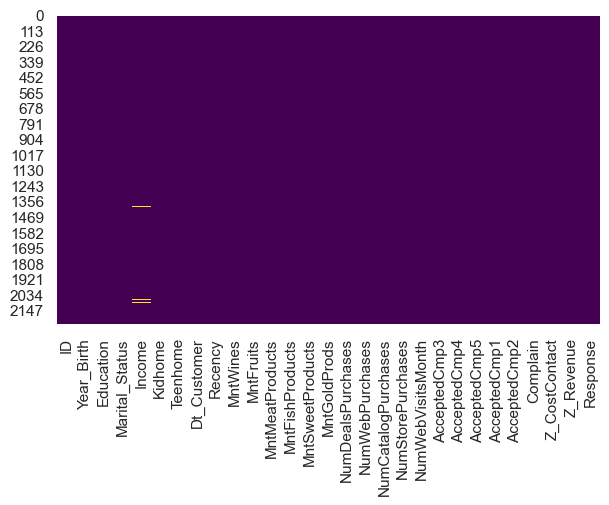

In [340]:
plt.figure(figsize=(7,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

In [341]:
# ## Part A — Data Preprocessing & Cleaning (separate)

# %%
# 1. Inspect columns and top rows
print('\nColumns:')
print(df.columns.tolist())
print('\nData types and non-null counts:')
print(df.info())
df['Income'].fillna(df['Income'].median(), inplace=True)
print('\nMissing values per column:')
print(df.isnull().sum())


Columns:
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5

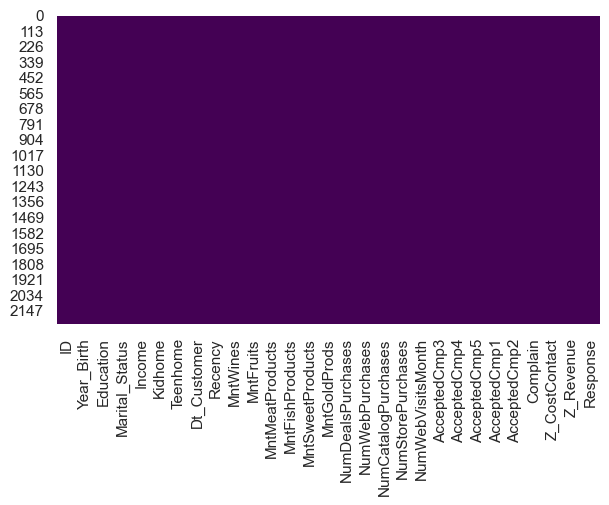

In [342]:
plt.figure(figsize=(7,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

In [343]:
# 2. Drop duplicates
dup_count = df.duplicated().sum()
print('\nDuplicate rows:', dup_count)
if dup_count > 0:
    df.drop_duplicates(inplace=True)


Duplicate rows: 0


In [344]:
# 3. Convert dates and create tenure if Dt_Customer exists
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
    df['Customer_Tenure_Days'] = (REF_DATE - df['Dt_Customer']).dt.days
    print('\nCustomer_Tenure_Days added. NA count:', df['Customer_Tenure_Days'].isnull().sum())



Customer_Tenure_Days added. NA count: 0


In [345]:
# 4. Create Age from Year_Birth (then drop Year_Birth if present)
if 'Year_Birth' in df.columns:
    df['Age'] = REF_DATE.year - df['Year_Birth']
    # drop original birth year to avoid redundancy
    df.drop(columns=['Year_Birth'], inplace=True)
    print('\nAge column created.')


Age column created.


In [346]:
# 5. Create TotalSpend from Mnt* columns
spend_cols = [c for c in df.columns if c.startswith('Mnt')]
print('\nSpend columns detected:', spend_cols)
if spend_cols:
    df['TotalSpend'] = df[spend_cols].sum(axis=1)
    print('TotalSpend created.')

# %%
# 6. Family size
if set(['Kidhome','Teenhome']).issubset(df.columns):
    df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + 1
    print('\nFamily_Size created.')


Spend columns detected: ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
TotalSpend created.

Family_Size created.


In [347]:
# 7. Campaign aggregated features
cmp_cols = [c for c in df.columns if c.startswith('AcceptedCmp')]
if cmp_cols:
    df['CampaignAcceptedCount'] = df[cmp_cols].sum(axis=1)
    df['AcceptedAnyCampaign'] = (df['CampaignAcceptedCount'] > 0).astype(int)
    print('\nCampaign aggregated features created.')

# %%
# 8. Behavior ratios
with np.errstate(divide='ignore', invalid='ignore'):
    if 'NumWebVisitsMonth' in df.columns:
        df['Spend_per_Visit'] = df['TotalSpend'] / (df['NumWebVisitsMonth'] + 1)
    if 'NumWebPurchases' in df.columns:
        df['Deal_Ratio'] = df['NumDealsPurchases'] / (df['NumWebPurchases'] + 1)

# Replace infs
df.replace([np.inf, -np.inf], np.nan, inplace=True)


Campaign aggregated features created.


In [348]:
if 'Income' in df.columns:
    n_missing_income = df['Income'].isnull().sum()
    print('\nMissing Income count before:', n_missing_income)
    if n_missing_income > 0:
        # group median by Education
        if 'Education' in df.columns:
            df['Income'] = df.groupby('Education')['Income'].transform(lambda x: x.fillna(x.median()))
        # fallback to global median
        df['Income'].fillna(df['Income'].median(), inplace=True)
    print('Missing Income after imputation:', df['Income'].isnull().sum())


Missing Income count before: 0
Missing Income after imputation: 0


In [349]:
# 9. Impute other numeric columns with median (to prepare for modeling)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Exclude target-like columns we don't want to impute specially
# We'll impute all numeric features used later
from sklearn.impute import SimpleImputer
num_imp = SimpleImputer(strategy='median')
df[numeric_cols] = num_imp.fit_transform(df[numeric_cols])
print('\nNumeric imputation done. Any NaNs left (numeric)?', df[numeric_cols].isnull().sum().sum())



Numeric imputation done. Any NaNs left (numeric)? 0


In [350]:
# 10. Handle categorical missing values
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if cat_cols:
    df[cat_cols] = df[cat_cols].fillna('Missing')
    print('\nCategorical imputation done for:', cat_cols)


Categorical imputation done for: ['Education', 'Marital_Status']


In [351]:
# 11. Outlier treatment (optional): cap Income and TotalSpend at 99th percentile
for col in ['Income','TotalSpend']:
    if col in df.columns:
        upper = df[col].quantile(0.99)
        lower = df[col].quantile(0.01)
        df[col] = df[col].clip(lower, upper)
        print(f'Clipped {col} to 1st-99th percentiles')


Clipped Income to 1st-99th percentiles
Clipped TotalSpend to 1st-99th percentiles


In [352]:
# 12. Drop obvious identifier columns if present (safe drop)
drop_candidates = [c for c in ['ID','Id','Customer_ID','Customer Id'] if c in df.columns]
if drop_candidates:
    df.drop(columns=drop_candidates, inplace=True)
    print('\nDropped identifier columns:', drop_candidates)

print('\nPreprocessing complete. Shape now:', df.shape)


Dropped identifier columns: ['ID']

Preprocessing complete. Shape now: (2240, 35)


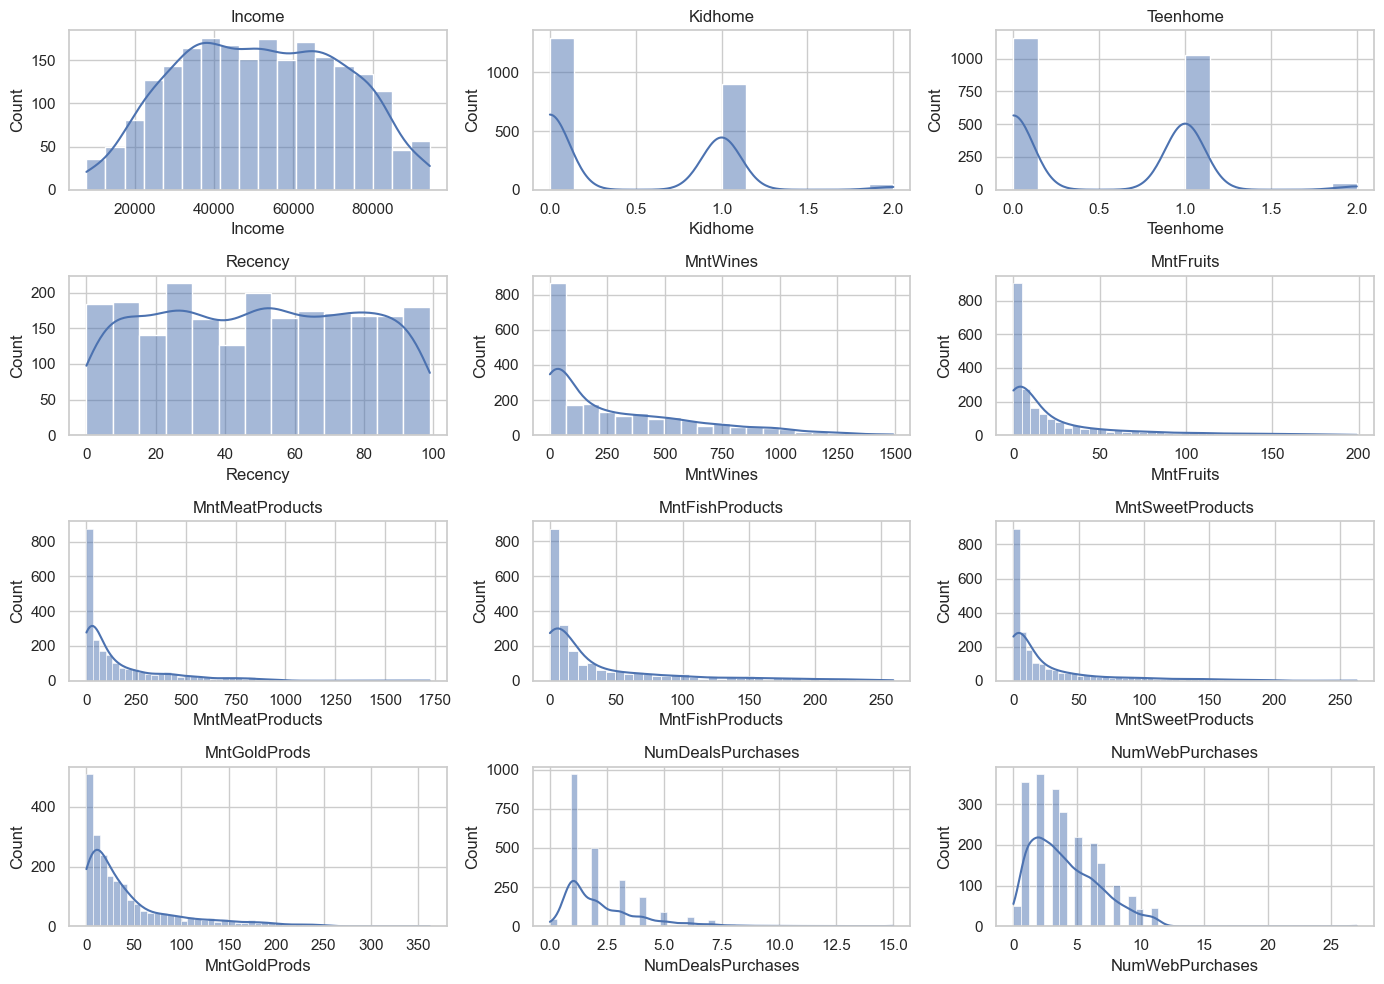

In [353]:

# We'll do univariate, bivariate, campaign analysis, and who purchased more.

# %%
# 1. Univariate: numeric distributions
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(14, 10))
for i, col in enumerate([c for c in num_cols if c not in ['Response','AcceptedAnyCampaign']][:12]):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout(); plt.show()


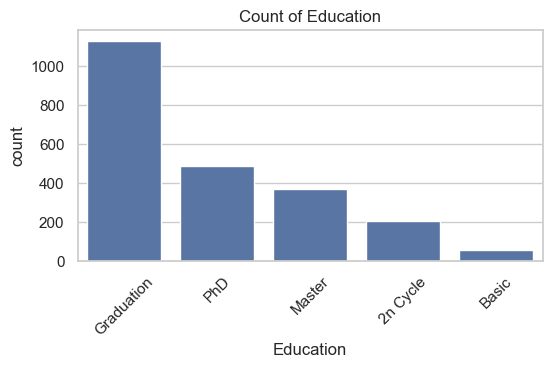

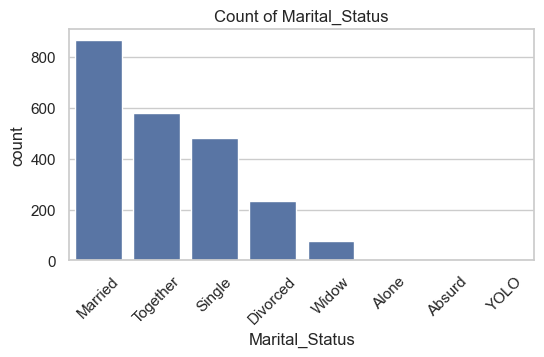

In [354]:
# 2. Univariate: categorical counts
for c in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=c, order=df[c].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count of {c}')
    plt.show()

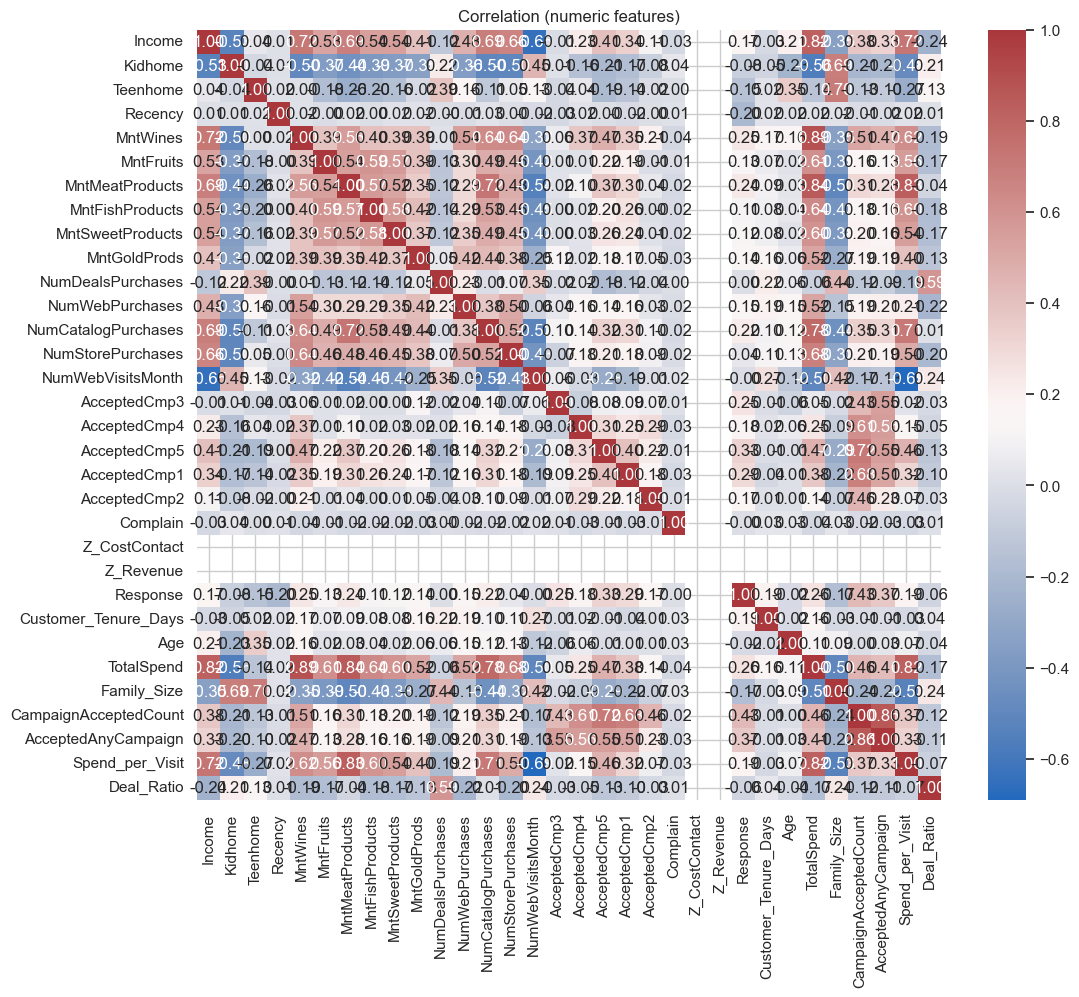

strong positive correlation between TotalSpend and Mnt* columns;Income vs TotalSpend correlation above.


In [355]:
# 3. Bivariate: Correlation heatmap (numeric only)
plt.figure(figsize=(12,10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation (numeric features)')
plt.show()

# Insight
print('strong positive correlation between TotalSpend and Mnt* columns;Income vs TotalSpend correlation above.')


In [356]:
# 4. Who purchased more? - Top spenders and by demographic groups
# Top 10 customers by TotalSpend
if 'TotalSpend' in df.columns:
    top10 = df.sort_values('TotalSpend', ascending=False).head(10)[['TotalSpend','Income','Age','Family_Size','Education','Marital_Status']]
    print('\nTop 10 customers by TotalSpend:')
    display(top10)


Top 10 customers by TotalSpend:


TotalSpend   Income   Age  Family_Size   Education Marital_Status
1288      2126.0  83151.0  53.0          1.0      Master        Married
1458      2126.0  93790.0  55.0          1.0  Graduation         Single
1010      2126.0  77568.0  46.0          2.0  Graduation       Together
1052      2126.0  69098.0  76.0          1.0         PhD        Married
644       2126.0  77632.0  78.0          1.0      Master       Together
1179      2126.0  90638.0  34.0          1.0      Master         Single
77        2126.0  75825.0  49.0          1.0  Graduation         Single
1259      2126.0  76653.0  56.0          1.0  Graduation       Together
1280      2126.0  78687.0  42.0          1.0  Graduation       Together
1301      2126.0  94384.0  72.0          1.0  Graduation       Together


Average TotalSpend by Education:


count        mean  median
Education                            
PhD           486  671.602881   493.0
Graduation   1127  618.212955   414.0
Master        370  607.856757   387.5
2n Cycle      203  495.881773   198.0
Basic          54   81.796296    57.0

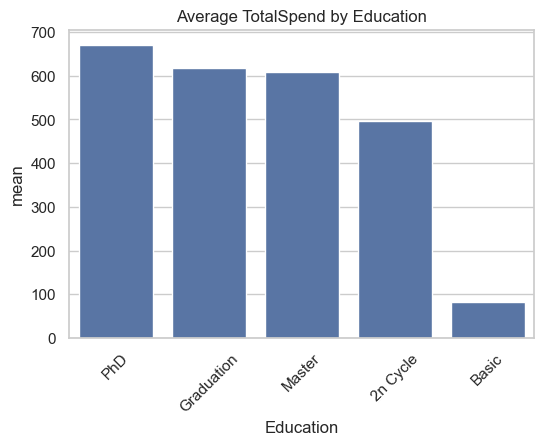

In [357]:
# Spend by Education
if 'Education' in df.columns:
    edu_spend = df.groupby('Education')['TotalSpend'].agg(['count','mean','median']).sort_values('mean', ascending=False)
    print('\nAverage TotalSpend by Education:')
    display(edu_spend)
    plt.figure(figsize=(6,4))
    sns.barplot(x=edu_spend.index, y=edu_spend['mean'])
    plt.title('Average TotalSpend by Education')
    plt.xticks(rotation=45); plt.show()


Average TotalSpend by Marital_Status:


count         mean
Marital_Status                    
Absurd              2  1192.500000
Widow              77   738.818182
Divorced          232   610.719828
Together          580   606.043103
Single            480   604.016667
Married           864   589.237269
YOLO                2   424.000000
Alone               3   256.666667

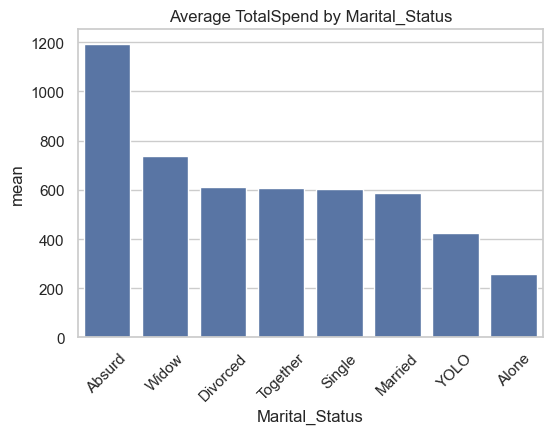

In [358]:
# Spend by Marital Status
if 'Marital_Status' in df.columns:
    ms_spend = df.groupby('Marital_Status')['TotalSpend'].agg(['count','mean']).sort_values('mean', ascending=False)
    print('\nAverage TotalSpend by Marital_Status:')
    display(ms_spend)
    plt.figure(figsize=(6,4))
    sns.barplot(x=ms_spend.index, y=ms_spend['mean'])
    plt.title('Average TotalSpend by Marital_Status')
    plt.xticks(rotation=45); plt.show()

In [359]:
# 5. Campaign analysis: who accepted campaigns and response rate
if 'Response' in df.columns:
    overall_response_rate = df['Response'].mean()
    print(f'Overall response rate (last campaign): {overall_response_rate:.3f}')

Overall response rate (last campaign): 0.149



Response rate by Education:


Education
PhD           0.207819
Master        0.154054
Graduation    0.134871
2n Cycle      0.108374
Basic         0.037037
Name: Response, dtype: float64

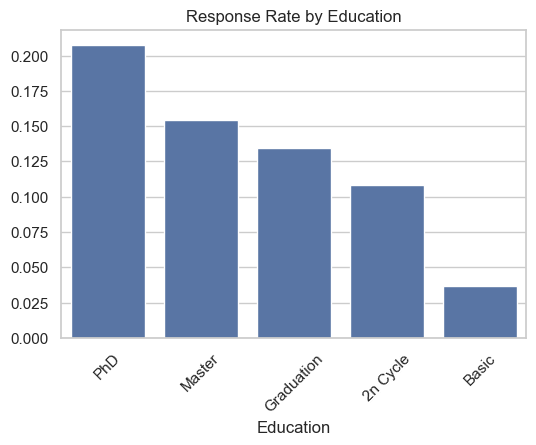

In [360]:
# Acceptance by Education
if 'Education' in df.columns and 'Response' in df.columns:
    edu_response = df.groupby('Education')['Response'].mean().sort_values(ascending=False)
    print('\nResponse rate by Education:')
    display(edu_response)
    plt.figure(figsize=(6,4))
    sns.barplot(x=edu_response.index, y=edu_response.values)
    plt.title('Response Rate by Education'); plt.xticks(rotation=45); plt.show()

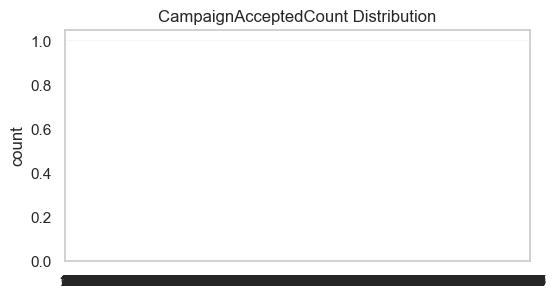

In [361]:
# CampaignAcceptedCount distribution
if 'CampaignAcceptedCount' in df.columns:
    plt.figure(figsize=(6,3))
    sns.countplot(df['CampaignAcceptedCount']); plt.title('CampaignAcceptedCount Distribution'); plt.show()

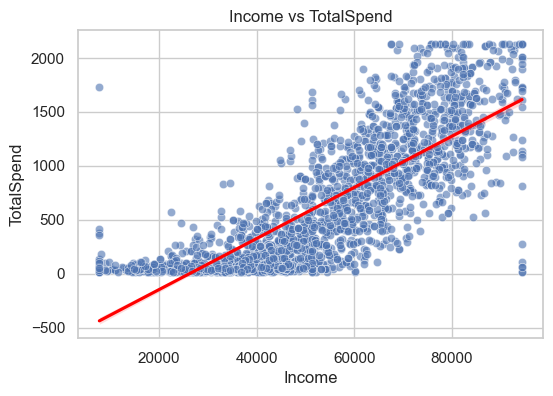

In [362]:
# 6. Relationship visualizations
# Income vs TotalSpend
if 'Income' in df.columns and 'TotalSpend' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x='Income', y='TotalSpend', alpha=0.6)
    sns.regplot(data=df, x='Income', y='TotalSpend', scatter=False, color='red')
    plt.title('Income vs TotalSpend')
    plt.show()

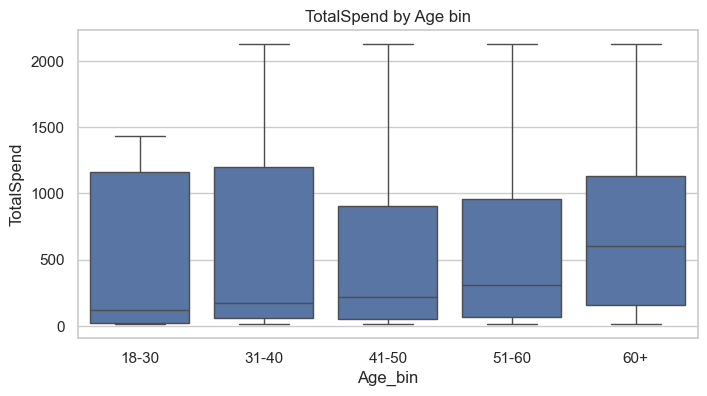

In [363]:
# Age vs TotalSpend boxplot by Age bins
if 'Age' in df.columns:
    df['Age_bin'] = pd.cut(df['Age'], bins=[17,30,40,50,60,100], labels=['18-30','31-40','41-50','51-60','60+'])
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='Age_bin', y='TotalSpend')
    plt.title('TotalSpend by Age bin'); plt.show()

count    2240.000000
mean       33.608842
std        11.845494
min         2.827633
25%        24.999372
50%        33.301753
75%        41.522494
max        77.838471
Name: Loyalty_Score, dtype: float64


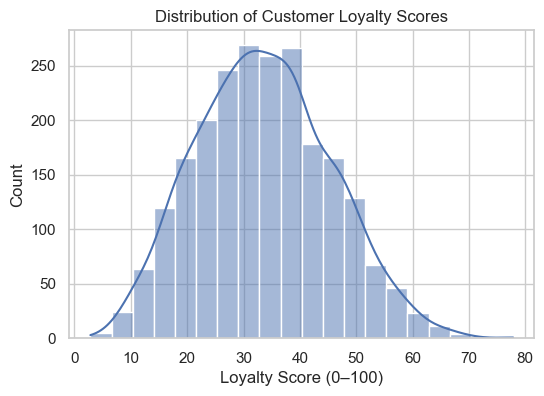

In [364]:
from sklearn.preprocessing import MinMaxScaler

# select loyalty-related features (check if they exist)
loyalty_features = ['Recency', 'NumStorePurchases', 'NumWebPurchases', 'CampaignAcceptedCount', 'Customer_Tenure_Days']
available = [f for f in loyalty_features if f in df.columns]

# scale 0-1
scaler_loyal = MinMaxScaler()
scaled = pd.DataFrame(scaler_loyal.fit_transform(df[available]), columns=available)

# build Loyalty Score
df['Loyalty_Score'] = (
    0.25*(1 - scaled['Recency']) +
    0.20*scaled['NumStorePurchases'] +
    0.20*scaled['NumWebPurchases'] +
    0.20*scaled['CampaignAcceptedCount'] +
    0.15*scaled['Customer_Tenure_Days']
) * 100  # convert to 0–100 scale

# show basic stats
print(df['Loyalty_Score'].describe())

# visualize
plt.figure(figsize=(6,4))
sns.histplot(df['Loyalty_Score'], bins=20, kde=True)
plt.title('Distribution of Customer Loyalty Scores')
plt.xlabel('Loyalty Score (0–100)')
plt.show()


In [365]:
# Insight summary of EDA
print('\nEDA Insights Summary:')
print('- TotalSpend correlates strongly with Mnt* product columns (expected).')
print('- Income has moderate positive relationship with TotalSpend (see scatter).')
print('- Certain education groups (check bar plots) show higher average spend.')
print('- Campaign acceptance varies by Education and customer behaviour features.')


EDA Insights Summary:
- TotalSpend correlates strongly with Mnt* product columns (expected).
- Income has moderate positive relationship with TotalSpend (see scatter).
- Certain education groups (check bar plots) show higher average spend.
- Campaign acceptance varies by Education and customer behaviour features.


In [424]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [367]:
# 1. Feature selection for clustering
cluster_features = [f for f in ['Income','Age','TotalSpend','Family_Size','Recency','NumWebPurchases',
                                'NumStorePurchases','NumCatalogPurchases','NumWebVisitsMonth','Spend_per_Visit',
                                'Deal_Ratio','CampaignAcceptedCount','Customer_Tenure_Days'] if f in df.columns]
print('\nSelected features for clustering:', cluster_features)

# Encode categorical features (Education, Marital_Status) as extra features
cat_to_encode = [c for c in ['Education','Marital_Status'] if c in df.columns]
encoded_df = pd.DataFrame()
for c in cat_to_encode:
    encoded_df[c+'_enc'] = df[c].astype('category').cat.codes
    cluster_features.append(c+'_enc')




Selected features for clustering: ['Income', 'Age', 'TotalSpend', 'Family_Size', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'Spend_per_Visit', 'Deal_Ratio', 'CampaignAcceptedCount', 'Customer_Tenure_Days']


In [368]:
# Build feature matrix

existing_features = [f for f in cluster_features if f in df.columns]
X = df[existing_features].copy()
print("Using features:", existing_features)

print('Feature matrix shape:', X.shape)


Using features: ['Income', 'Age', 'TotalSpend', 'Family_Size', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'Spend_per_Visit', 'Deal_Ratio', 'CampaignAcceptedCount', 'Customer_Tenure_Days']
Feature matrix shape: (2240, 13)


In [369]:
# 2. Imputation & scaling (again, ensure no NaNs)
num_imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(num_imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)


PCA explained variance (2 comps): [0.38809961 0.10939925]


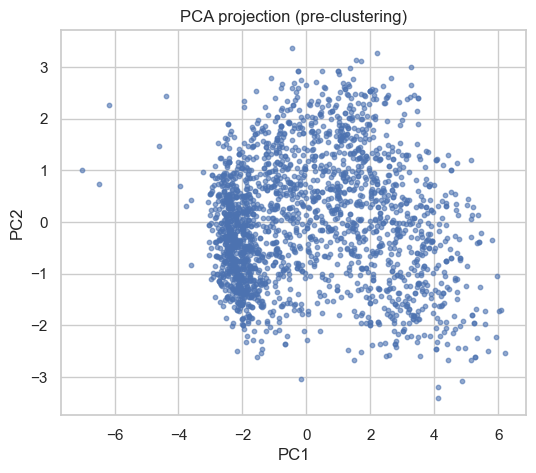

In [370]:
# 3. PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print('\nPCA explained variance (2 comps):', pca.explained_variance_ratio_)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=10, alpha=0.6)
plt.title('PCA projection (pre-clustering)'); plt.xlabel('PC1'); plt.ylabel('PC2'); plt.show()

In [371]:
# 4. Clustering: KMeans (k 2..10)
inertia, sil_scores, db_scores, ch_scores = [], [], [], []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    print(f'K={k} | Silhouette={sil_scores[-1]:.4f} | DB={db_scores[-1]:.4f} | CH={ch_scores[-1]:.2f}')

K=2 | Silhouette=0.2996 | DB=1.4095 | CH=960.74
K=3 | Silhouette=0.2238 | DB=1.7219 | CH=688.43
K=4 | Silhouette=0.1460 | DB=2.0041 | CH=534.17
K=5 | Silhouette=0.1510 | DB=1.6912 | CH=518.47
K=6 | Silhouette=0.1548 | DB=1.6417 | CH=478.10
K=7 | Silhouette=0.1523 | DB=1.7059 | CH=435.71
K=8 | Silhouette=0.1311 | DB=1.7748 | CH=402.29
K=9 | Silhouette=0.1302 | DB=1.7425 | CH=376.04
K=10 | Silhouette=0.1334 | DB=1.7493 | CH=352.62


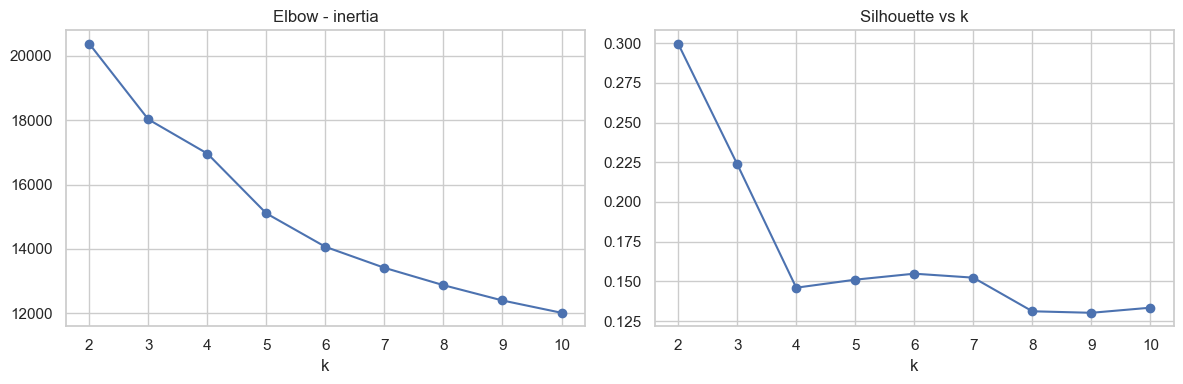

In [372]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(list(K_range), inertia, marker='o'); plt.title('Elbow - inertia'); plt.xlabel('k')
plt.subplot(1,2,2); plt.plot(list(K_range), sil_scores, marker='o'); plt.title('Silhouette vs k'); plt.xlabel('k')
plt.tight_layout(); plt.show()




Best k by silhouette: 2
KMeans silhouette: 0.29957358013627683


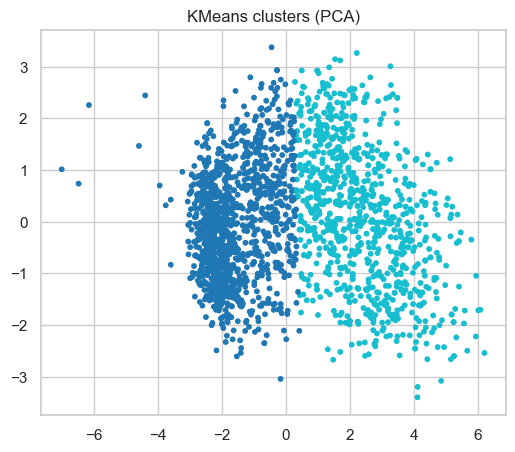

In [373]:
best_k = int(K_range[np.argmax(sil_scores)])
print('\nBest k by silhouette:', best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=30)
k_labels = kmeans.fit_predict(X_scaled)
df['Cluster_KMeans'] = k_labels
print('KMeans silhouette:', silhouette_score(X_scaled, k_labels))

plt.figure(figsize=(6,5)); plt.scatter(X_pca[:,0], X_pca[:,1], c=k_labels, cmap='tab10', s=10); plt.title('KMeans clusters (PCA)'); plt.show()

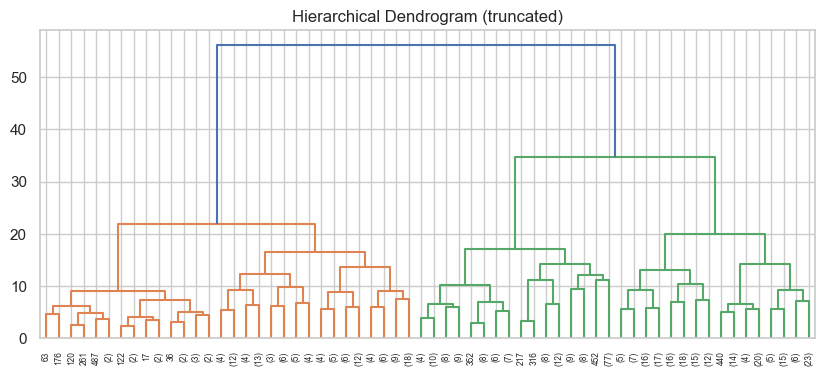

In [374]:
# 5. Hierarchical clustering (Ward) - dendrogram sample + flat clustering
X_scaled_df = X_scaled.copy()
sample_df = X_scaled_df.sample(n=min(500, X_scaled_df.shape[0]), random_state=42)
Z = linkage(sample_df, method='ward')
plt.figure(figsize=(10,4)); dendrogram(Z, truncate_mode='level', p=5); plt.title('Hierarchical Dendrogram (truncated)'); plt.show()



Hierarchical silhouette: 0.25514608482437495


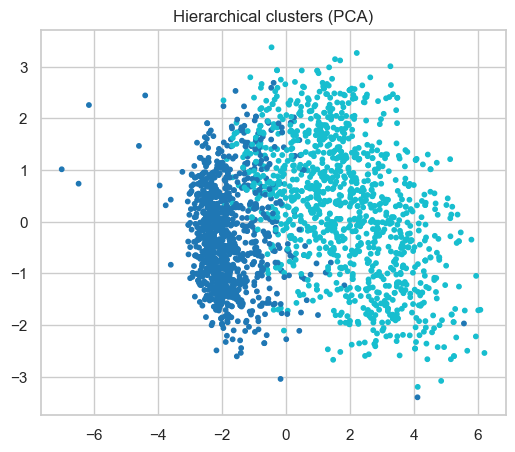

In [375]:
hier_full = linkage(X_scaled_df, method='ward')
hier_labels = fcluster(hier_full, t=best_k, criterion='maxclust') - 1
df['Cluster_Hier'] = hier_labels
print('Hierarchical silhouette:', silhouette_score(X_scaled, hier_labels))

plt.figure(figsize=(6,5)); plt.scatter(X_pca[:,0], X_pca[:,1], c=hier_labels, cmap='tab10', s=10); plt.title('Hierarchical clusters (PCA)'); plt.show()

DBSCAN eps=0.8, ms=5 -> clusters=10, silhouette=-0.2720
DBSCAN eps=0.8, ms=10 -> clusters=4, silhouette=-0.1914
DBSCAN eps=1.0, ms=5 -> clusters=11, silhouette=-0.2504
DBSCAN eps=1.0, ms=10 -> clusters=3, silhouette=-0.1206

Best DBSCAN: 1.0 10 silhouette: -0.12058771020781826


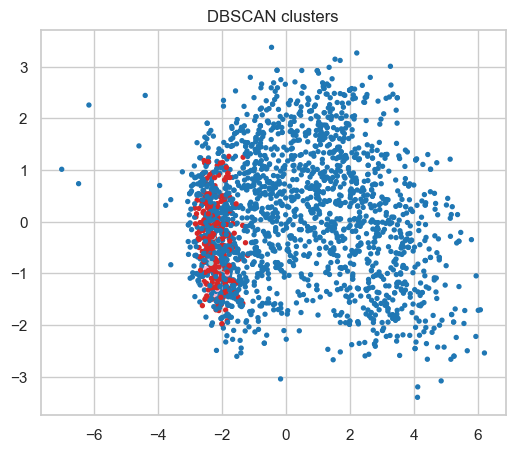

In [376]:
# 6. DBSCAN (grid search)
eps_values = [0.3, 0.5, 0.8, 1.0]
min_samples_values = [5, 10, 20]
best_db = None
best_db_score = -1
for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels_db = db.fit_predict(X_scaled)
        n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
        if n_clusters <= 1:
            continue
        sil = silhouette_score(X_scaled, labels_db)
        print(f'DBSCAN eps={eps}, ms={ms} -> clusters={n_clusters}, silhouette={sil:.4f}')
        if sil > best_db_score:
            best_db_score = sil
            best_db = (eps, ms, labels_db)

if best_db:
    eps, ms, labels_db = best_db
    df['Cluster_DBSCAN'] = labels_db
    print('\nBest DBSCAN:', eps, ms, 'silhouette:', best_db_score)
    plt.figure(figsize=(6,5)); plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_db, cmap='tab20', s=8); plt.title('DBSCAN clusters'); plt.show()
else:
    print('\nDBSCAN: no useful clustering found with tried grid.')

GMM k=2 -> Silhouette=0.2735
GMM k=3 -> Silhouette=0.1985
GMM k=4 -> Silhouette=0.1329
GMM k=5 -> Silhouette=0.0497
GMM k=6 -> Silhouette=0.0918
GMM k=7 -> Silhouette=0.0918
GMM k=8 -> Silhouette=0.0706
GMM k=9 -> Silhouette=0.0795
GMM k=10 -> Silhouette=0.0523

Best GMM k: 2 silhouette: 0.2735419541657383


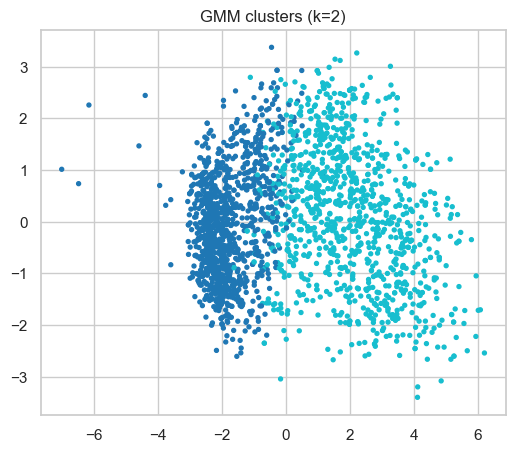

In [377]:
# 7. Gaussian Mixture Model (GMM)
best_gmm = None
best_gmm_score = -1
for k in K_range:
    gmm = GaussianMixture(n_components=k, random_state=42, covariance_type='full', n_init=5)
    labels_gmm = gmm.fit_predict(X_scaled)
    try:
        sil = silhouette_score(X_scaled, labels_gmm)
    except:
        sil = -1
    print(f'GMM k={k} -> Silhouette={sil:.4f}')
    if sil > best_gmm_score:
        best_gmm_score = sil
        best_gmm = (k, gmm, labels_gmm)

if best_gmm:
    k_gmm, gmm_model, labels_gmm = best_gmm
    df['Cluster_GMM'] = labels_gmm
    print('\nBest GMM k:', k_gmm, 'silhouette:', best_gmm_score)
    plt.figure(figsize=(6,5)); plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_gmm, cmap='tab10', s=8); plt.title(f'GMM clusters (k={k_gmm})'); plt.show()


In [378]:
# 8. Model comparison table
models = {}
models['KMeans'] = dict(labels=k_labels, silhouette=silhouette_score(X_scaled, k_labels), db=davies_bouldin_score(X_scaled, k_labels))
models['Hierarchical'] = dict(labels=hier_labels, silhouette=silhouette_score(X_scaled, hier_labels), db=davies_bouldin_score(X_scaled, hier_labels))
if best_db:
    models['DBSCAN'] = dict(labels=labels_db, silhouette=best_db_score, db=davies_bouldin_score(X_scaled, labels_db))
if best_gmm:
    models['GMM'] = dict(labels=labels_gmm, silhouette=best_gmm_score, db=davies_bouldin_score(X_scaled, labels_gmm))

print('\nModel comparison (Silhouette, Davies-Bouldin):')
for name, v in models.items():
    print(f"{name}: silhouette={v['silhouette']:.4f}, db={v['db']:.4f}")


Model comparison (Silhouette, Davies-Bouldin):
KMeans: silhouette=0.2996, db=1.4095
Hierarchical: silhouette=0.2551, db=1.5071
DBSCAN: silhouette=-0.1206, db=1.5668
GMM: silhouette=0.2735, db=1.4579


In [440]:
# 9. Cluster profiling for chosen model (choose best by silhouette)
best_model_name = max(models.items(), key=lambda x: x[1]['silhouette'])[0]
print('\nBest model by silhouette:', best_model_name)
best_labels = models[best_model_name]['labels']
df['Cluster_Best'] = best_labels
cluster_map = {
    1: 'Loyal and Happy',
    0: 'Less Purchase'
}

df['Cluster_Best'] = df['Cluster_Best'].map(cluster_map)




Best model by silhouette: KMeans


In [441]:
profile_features = ['Income','TotalSpend','Age','Family_Size','Recency','CampaignAcceptedCount']
profile = df.groupby('Cluster_Best')[profile_features].agg(['count','mean','median','std']).round(2)
print('\nCluster profile (best model):')
profile


Cluster profile (best model):


Income                              TotalSpend           \
                 count      mean   median       std      count     mean   
Cluster_Best                                                              
Less Purchase     1326  38418.48  38200.5  13830.46       1326   181.46   
Loyal and Happy    914  71133.06  71064.5  11413.52        914  1217.17   

                                  Age                      Family_Size        \
                 median     std count   mean median    std       count  mean   
Cluster_Best                                                                   
Less Purchase      88.5  198.34  1326  54.76   53.0  11.41        1326  2.26   
Loyal and Happy  1163.0  426.96   914  58.28   58.0  12.48         914  1.51   

                             Recency                       \
                median   std   count   mean median    std   
Cluster_Best                                                
Less Purchase      2.0  0.70    1326  48.77   49.0  28.83   
Loyal and Happy    1.0  0.59     914  49.60   51.0  29.16   

                CampaignAcceptedCount                     
                                count  mean median   std  
Cluster_Best                                              
Less Purchase                    1326  0.11    0.0  0.33  
Loyal and Happy                   914  0.58    0.0  0.92

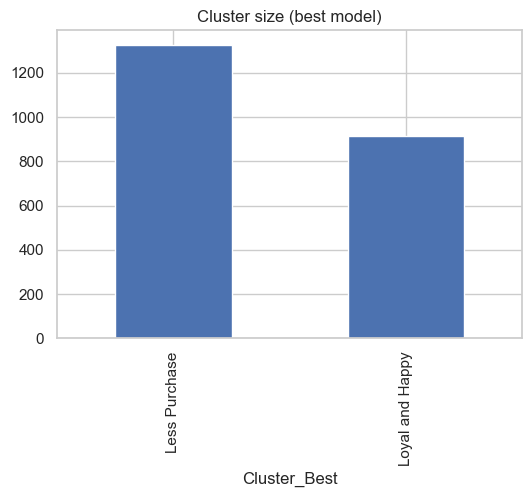

In [442]:
# Visualize cluster sizes
plt.figure(figsize=(6,4)); df['Cluster_Best'].value_counts().sort_index().plot(kind='bar'); plt.title('Cluster size (best model)'); plt.show()



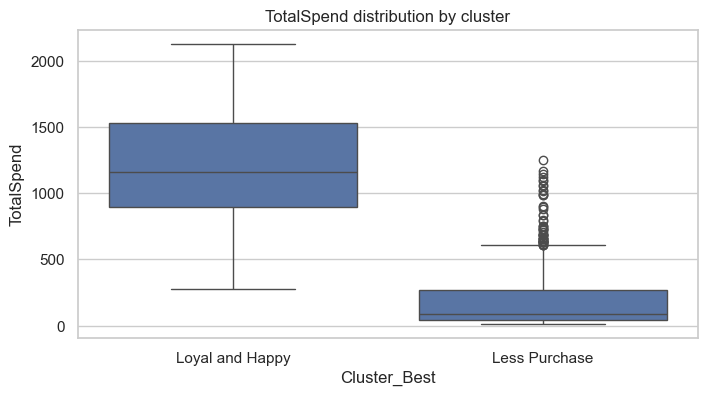

In [443]:
# Spend per cluster
if 'TotalSpend' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='Cluster_Best', y='TotalSpend')
    plt.title('TotalSpend distribution by cluster'); plt.show()




Response rate by cluster:


Cluster_Best
Less Purchase      0.10
Loyal and Happy    0.22
Name: Response, dtype: float64

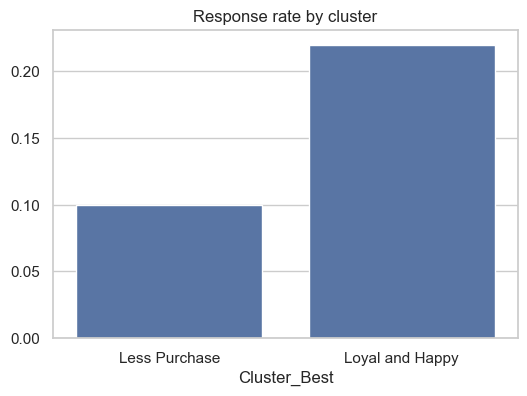

In [444]:
# Campaign acceptance rate per cluster
if 'Response' in df.columns:
    cluster_response = df.groupby('Cluster_Best')['Response'].mean().round(3)
    print('\nResponse rate by cluster:')
    display(cluster_response)
    plt.figure(figsize=(6,4)); sns.barplot(x=cluster_response.index, y=cluster_response.values); plt.title('Response rate by cluster'); plt.show()


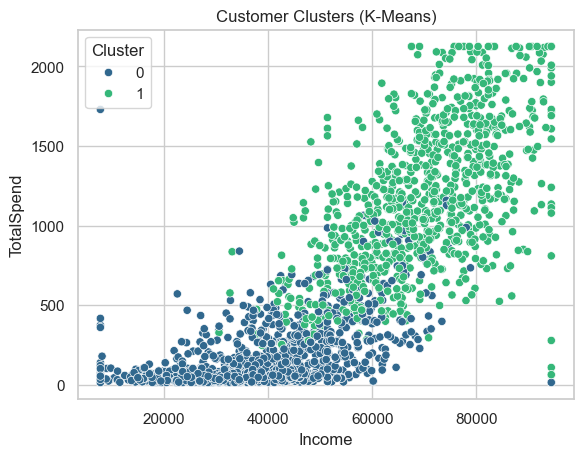

In [473]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='Income', y='TotalSpend', hue='Cluster', palette='viridis')
plt.title('Customer Clusters (K-Means)')
plt.show()



In [474]:
# Summarize clusters by important behavior metrics
cluster_summary = df.groupby('Cluster')[['Loyalty_Score', 'Recency', 'TotalSpend']].mean().round(2)
print(cluster_summary)

# Automatically detect cluster roles
loyal_cluster = cluster_summary['Loyalty_Score'].idxmax()   # highest loyalty
less_recent_cluster = cluster_summary['Recency'].idxmax()   # highest recency (less recent purchases)

print(f"\nCluster {loyal_cluster} → Happy and Loyal Customers ")
print(f"Cluster {less_recent_cluster} → Less Recent Purchases ")


         Loyalty_Score  Recency  TotalSpend
Cluster                                    
0                26.95    52.08      170.60
1                42.17    45.29     1161.39

Cluster 1 → Happy and Loyal Customers 
Cluster 0 → Less Recent Purchases 


In [505]:
# Average demographics per cluster
demo_summary = df.groupby('Cluster')[['Age', 'Kidhome', 'Teenhome']].mean().round(1)
demo_summary['Family_Size'] = demo_summary['Kidhome'] + demo_summary['Teenhome'] + 2  # assuming 2 adults
demo_summary


Age  Kidhome  Teenhome  Family_Size
Cluster                                      
0        54.3      0.7       0.5          3.2
1        58.6      0.1       0.5          2.6

In [476]:
cat_summary = df.groupby('Cluster')[['Education', 'Marital_Status']].agg(lambda x: x.value_counts().index[0])
cat_summary


Education Marital_Status
Cluster                           
0        Graduation        Married
1        Graduation        Married

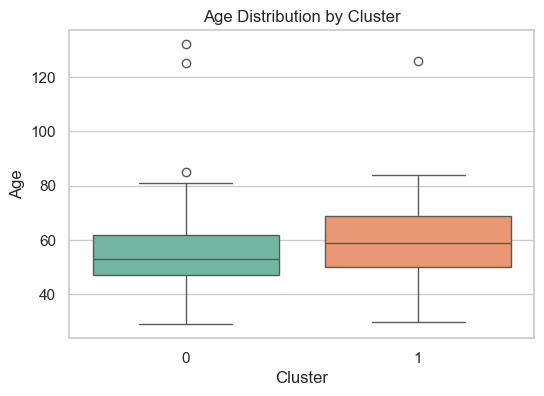

In [477]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Cluster', y='Age', palette='Set2')
plt.title('Age Distribution by Cluster')
plt.show()


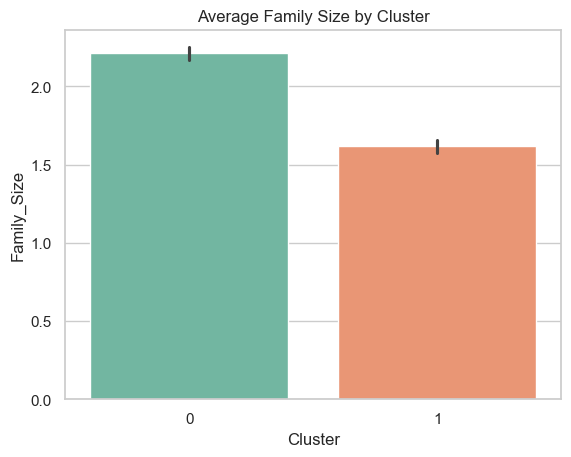

In [478]:
sns.barplot(data=df, x='Cluster', y='Family_Size', palette='Set2')
plt.title('Average Family Size by Cluster')
plt.show()


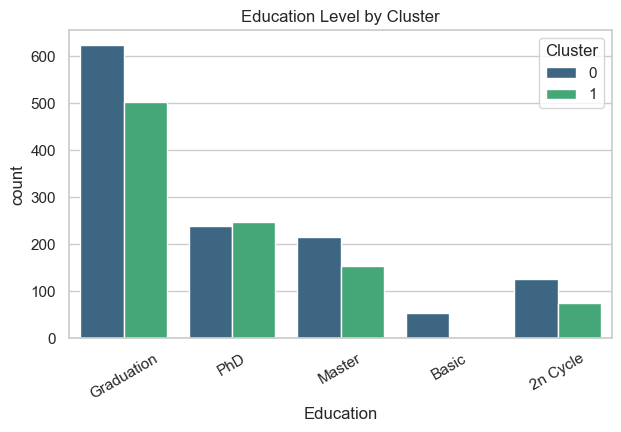

In [479]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Education', hue='Cluster', palette='viridis')
plt.title('Education Level by Cluster')
plt.xticks(rotation=30)
plt.show()


In [480]:
# Select columns for profiling
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

demo_cols = ['Age', 'Income', 'Education', 'Marital_Status']
behavior_cols = ['TotalSpend', 'Recency', 'Loyalty_Score', 'CampaignAcceptedCount']

# Combine all for profiling
profile_cols = demo_cols + product_cols + behavior_cols

# Ensure columns exist
profile_cols = [c for c in profile_cols if c in df.columns]

# Create summary
cluster_profile = df.groupby('Cluster')[profile_cols].agg(
    {
        'Age': 'mean',
        'Income': 'mean',
        'TotalSpend': 'mean',
        'Recency': 'mean',
        'Loyalty_Score': 'mean',
        'CampaignAcceptedCount': 'mean',
        'MntWines': 'mean',
        'MntFruits': 'mean',
        'MntMeatProducts': 'mean',
        'MntFishProducts': 'mean',
        'MntSweetProducts': 'mean',
        'MntGoldProds': 'mean',
        'Education': lambda x: x.value_counts().index[0],
        'Marital_Status': lambda x: x.value_counts().index[0],
    }
).round(2)

cluster_profile['Count'] = df['Cluster'].value_counts().sort_index()
cluster_profile


Age    Income  TotalSpend  Recency  Loyalty_Score  \
Cluster                                                        
0        54.34  37930.78      170.60    52.08          26.95   
1        58.57  69556.87     1161.39    45.29          42.17   

         CampaignAcceptedCount  MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                
0                         0.08     79.73       7.87            40.66   
1                         0.58    592.20      50.00           329.32   

         MntFishProducts  MntSweetProducts  MntGoldProds   Education  \
Cluster                                                                
0                  11.59              8.19         22.49  Graduation   
1                  70.87             51.33         71.70  Graduation   

        Marital_Status  Count  
Cluster                        
0              Married   1260  
1              Married    980

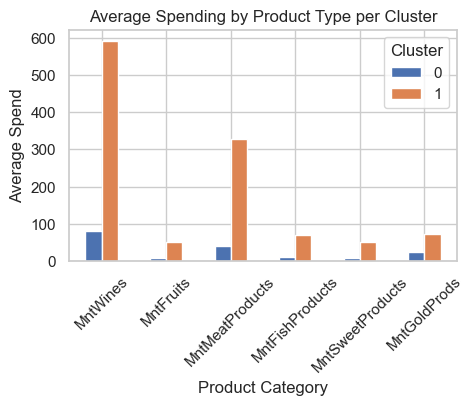

In [481]:
import matplotlib.pyplot as plt

product_means = df.groupby('Cluster')[product_cols].mean()
product_means.T.plot(kind='bar', figsize=(5,3))
plt.title('Average Spending by Product Type per Cluster')
plt.ylabel('Average Spend')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


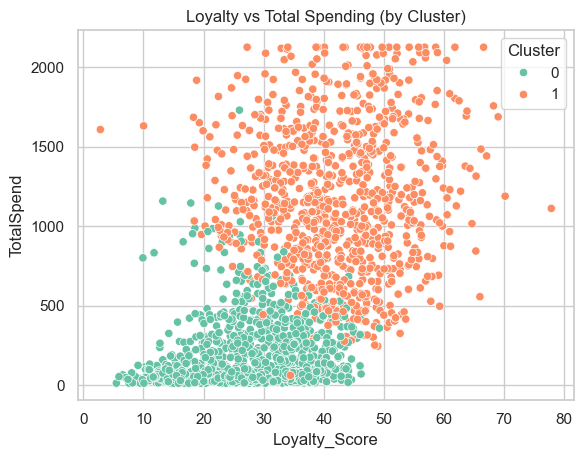

Correlation between Loyalty and Spending: 0.55


In [482]:
sns.scatterplot(data=df, x='Loyalty_Score', y='TotalSpend', hue='Cluster', palette='Set2')
plt.title('Loyalty vs Total Spending (by Cluster)')
plt.show()

corr = df['Loyalty_Score'].corr(df['TotalSpend'])
print(f"Correlation between Loyalty and Spending: {corr:.2f}")

In [483]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [484]:
# Features for clustering
features = ['Age', 'Income', 'TotalSpend', 'Recency', 
            'Customer_Tenure_Days', 'CampaignAcceptedCount', 'Loyalty_Score']

# Scale data
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3D PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

# Add to DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]


In [485]:
cluster_names = {0:'Less Recent Purchases' , 1: 'Happy and Loyal'}
df['Cluster_Label'] = df['Cluster'].map(cluster_names)


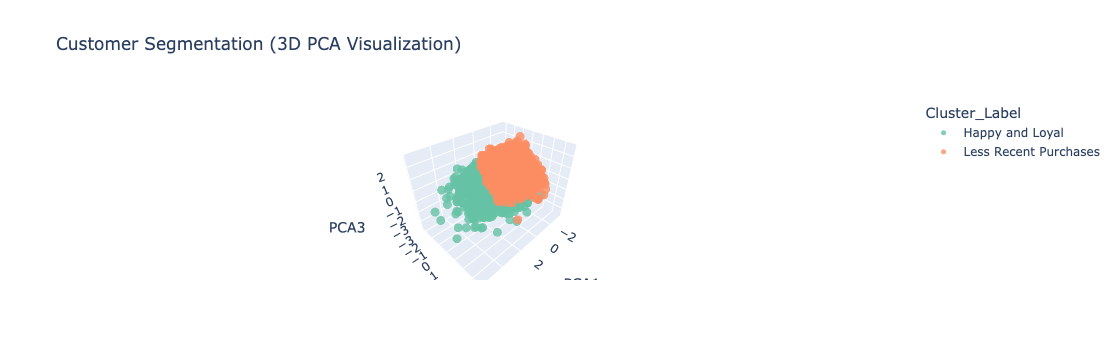

In [486]:
fig = px.scatter_3d(
    df,
    x='PCA1', y='PCA2', z='PCA3',
    color='Cluster_Label',  # or 'Cluster'
    hover_data=['Age', 'Income', 'Loyalty_Score', 'TotalSpend'],
    title='Customer Segmentation (3D PCA Visualization)',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()


In [487]:
# Define high vs low spenders within each cluster
def spending_category(x, threshold):
    return 'High Spending' if x >= threshold else 'Low Spending'

# Threshold can be median or quantile
loyal_threshold = loyal_df['TotalSpend'].median()
recent_threshold = less_recent_df['TotalSpend'].median()

loyal_df['Spending_Group'] = loyal_df['TotalSpend'].apply(lambda x: spending_category(x, loyal_threshold))
less_recent_df['Spending_Group'] = less_recent_df['TotalSpend'].apply(lambda x: spending_category(x, recent_threshold))


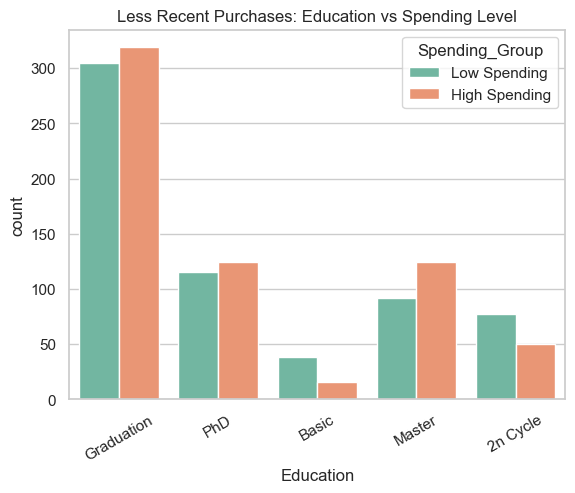

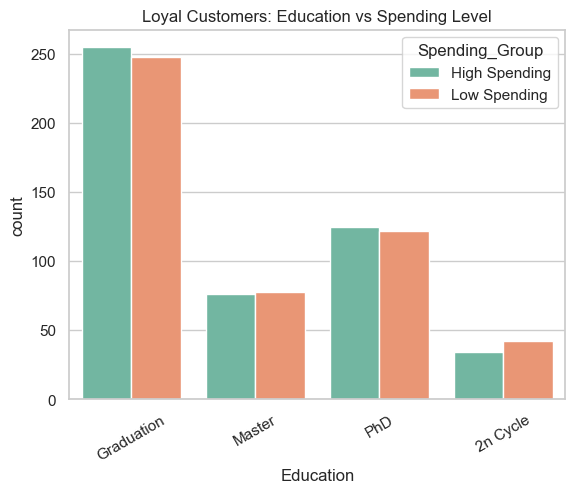

In [488]:
sns.countplot(data=loyal_df, x='Education', hue='Spending_Group', palette='Set2')
plt.title('Less Recent Purchases: Education vs Spending Level')
plt.xticks(rotation=30)
plt.show()

sns.countplot(data=less_recent_df, x='Education', hue='Spending_Group', palette='Set2')
plt.title('Loyal Customers: Education vs Spending Level')
plt.xticks(rotation=30)
plt.show()


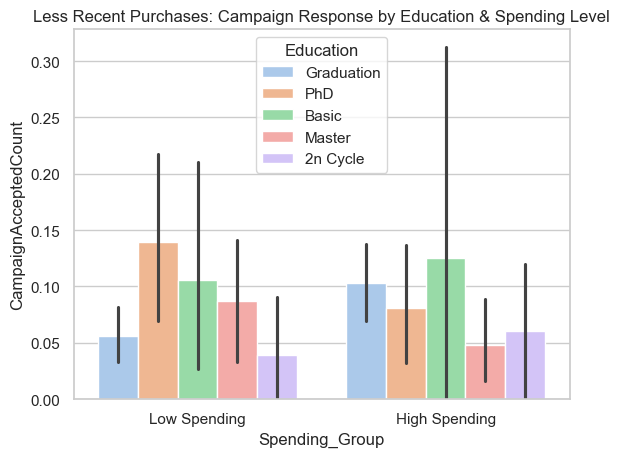

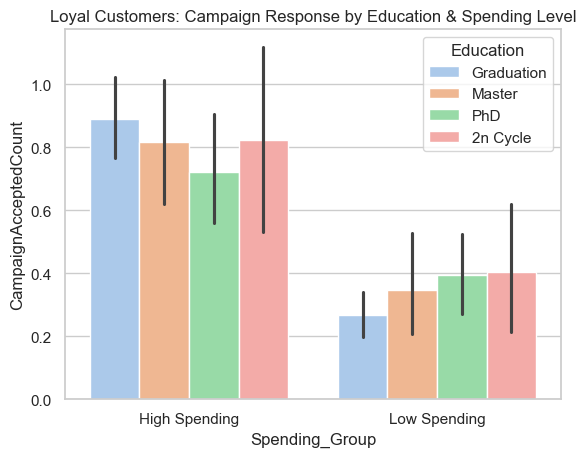

In [489]:
sns.barplot(data=loyal_df, x='Spending_Group', y='CampaignAcceptedCount', hue='Education', palette='pastel')
plt.title('Less Recent Purchases: Campaign Response by Education & Spending Level')
plt.show()

sns.barplot(data=less_recent_df, x='Spending_Group', y='CampaignAcceptedCount', hue='Education', palette='pastel')
plt.title('Loyal Customers: Campaign Response by Education & Spending Level')
plt.show()


In [490]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Choose numeric features relevant for subclustering
sub_features = ['Income', 'TotalSpend', 'Recency', 'CampaignAcceptedCount']

# Loyal group sub-clustering
scaler = StandardScaler()
X_loyal = scaler.fit_transform(loyal_df[sub_features])
kmeans_loyal = KMeans(n_clusters=2, random_state=42)
loyal_df['SubCluster'] = kmeans_loyal.fit_predict(X_loyal)

# Less recent group sub-clustering
X_recent = scaler.fit_transform(less_recent_df[sub_features])
kmeans_recent = KMeans(n_clusters=2, random_state=42)
less_recent_df['SubCluster'] = kmeans_recent.fit_predict(X_recent)


In [491]:
print("Less Recent Purchases Sub-Cluster Counts:")
print(loyal_df['SubCluster'].value_counts())
print("\n Loyal Customers Sub-Cluster Counts:")
print(less_recent_df['SubCluster'].value_counts())


Less Recent Purchases Sub-Cluster Counts:
SubCluster
0    872
1    388
Name: count, dtype: int64

 Loyal Customers Sub-Cluster Counts:
SubCluster
1    606
0    374
Name: count, dtype: int64


In [492]:
# For loyal group
loyal_summary = loyal_df.groupby('SubCluster')[sub_features].mean().round(2)
print("\nLess Recent Purchases Sub-Cluster Summary:")
print(loyal_summary)

# For less recent group
recent_summary = less_recent_df.groupby('SubCluster')[sub_features].mean().round(2)
print("Loyal Customers Sub-Cluster Summary:")
print(recent_summary)



Less Recent Purchases Sub-Cluster Summary:
              Income  TotalSpend  Recency  CampaignAcceptedCount
SubCluster                                                      
0           31535.61       76.88    45.69                   0.09
1           52303.42      381.21    66.45                   0.06
Loyal Customers Sub-Cluster Summary:
              Income  TotalSpend  Recency  CampaignAcceptedCount
SubCluster                                                      
0           79854.18     1578.31    54.28                   1.15
1           63201.77      904.08    39.74                   0.22


In [493]:
def describe_subcluster(df, name):
    summary = df.groupby('SubCluster')[['Income','TotalSpend','Recency','CampaignAcceptedCount']].mean().round(2)
    print(f"\n{name} Sub-Cluster Insights:")
    for i in summary.index:
        print(f"SubCluster {i}:")
        print(f"  Avg Income: {summary.loc[i, 'Income']}")
        print(f"  Avg Spend: {summary.loc[i, 'TotalSpend']}")
        print(f"  Avg Recency: {summary.loc[i, 'Recency']}")
        print(f"  Avg Campaign Accepted: {summary.loc[i, 'CampaignAcceptedCount']}\n")

describe_subcluster(loyal_df, "Less Recent Purchases ")
describe_subcluster(less_recent_df, "Loyal Customers")



Less Recent Purchases  Sub-Cluster Insights:
SubCluster 0:
  Avg Income: 31535.61
  Avg Spend: 76.88
  Avg Recency: 45.69
  Avg Campaign Accepted: 0.09

SubCluster 1:
  Avg Income: 52303.42
  Avg Spend: 381.21
  Avg Recency: 66.45
  Avg Campaign Accepted: 0.06


Loyal Customers Sub-Cluster Insights:
SubCluster 0:
  Avg Income: 79854.18
  Avg Spend: 1578.31
  Avg Recency: 54.28
  Avg Campaign Accepted: 1.15

SubCluster 1:
  Avg Income: 63201.77
  Avg Spend: 904.08
  Avg Recency: 39.74
  Avg Campaign Accepted: 0.22



In [494]:
final_df = pd.concat([loyal_df, less_recent_df], ignore_index=True)
final_df.head()


Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  Graduation         Single  46344.0      1.0       1.0  2014-03-08     38.0   
1  Graduation       Together  26646.0      1.0       0.0  2014-02-10     26.0   
2         PhD        Married  58293.0      1.0       0.0  2014-01-19     94.0   
3         PhD        Married  33454.0      1.0       0.0  2013-05-08     32.0   
4         PhD       Together  30351.0      1.0       0.0  2013-06-06     19.0   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0      11.0        1.0              6.0              2.0               1.0   
1      11.0        4.0             20.0             10.0               3.0   
2     173.0       43.0            118.0             46.0              27.0   
3      76.0       10.0             56.0              3.0               1.0   
4      14.0        0.0             24.0              3.0               3.0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           6.0                2.0              1.0                  1.0   
1           5.0                2.0              2.0                  0.0   
2          15.0                5.0              5.0                  3.0   
3          23.0                2.0              4.0                  0.0   
4           2.0                1.0              3.0                  0.0   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                2.0                5.0           0.0           0.0   
1                4.0                6.0           0.0           0.0   
2                6.0                5.0           0.0           0.0   
3                4.0                8.0           0.0           0.0   
4                2.0                9.0           0.0           0.0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0           0.0           0.0           0.0       0.0            3.0   
1           0.0           0.0           0.0       0.0            3.0   
2           0.0           0.0           0.0       0.0            3.0   
3           0.0           0.0           0.0       0.0            3.0   
4           0.0           0.0           0.0       0.0            3.0   

   Z_Revenue  Response  Customer_Tenure_Days   Age  TotalSpend  Family_Size  \
0       11.0       0.0                4233.0  71.0        27.0          3.0   
1       11.0       0.0                4259.0  41.0        53.0          2.0   
2       11.0       0.0                4281.0  44.0       422.0          2.0   
3       11.0       0.0                4537.0  40.0       169.0          2.0   
4       11.0       1.0                4508.0  51.0        46.0          2.0   

   CampaignAcceptedCount  AcceptedAnyCampaign  Spend_per_Visit  Deal_Ratio  \
0                    0.0                  0.0         4.500000    1.000000   
1                    0.0                  0.0         7.571429    0.666667   
2                    0.0                  0.0        70.333333    0.833333   
3                    0.0                  0.0        18.777778    0.400000   
4                    0.0                  0.0         4.600000    0.250000   

  Age_bin  Loyalty_Score  Cluster_KMeans  Cluster_Hier  Cluster_DBSCAN  \
0     60+      21.646597               0             0              -1   
1   41-50      29.052504               0             0               0   
2   41-50      17.652035               0             0              -1   
3   31-40      34.984499               0             0               0   
4   51-60      33.827346               0             0               0   

   Cluster_GMM  Cluster_Best  Cluster    Cluster_Label      PCA1      PCA2  \
0            0             0        0  Happy and Loyal -1.320393  0.480205   
1            0             0        0  Happy and Loyal -1.626482 -1.010757   
2            0             0        0  Happy and Loyal -1.406341  1.641606   
3            0             0  

In [495]:
final_df = pd.concat([loyal_df, less_recent_df], ignore_index=True)
final_df['MainCluster'] = final_df['Cluster']
final_df['CombinedCluster'] = final_df['MainCluster'].astype(str) + "_" + final_df['SubCluster'].astype(str)


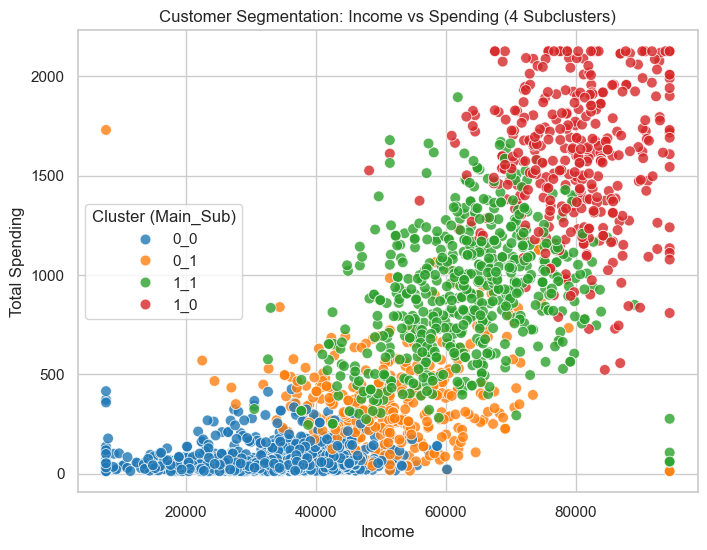

In [496]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=final_df,
    x='Income', y='TotalSpend',
    hue='CombinedCluster',
    palette='tab10',
    alpha=0.8,
    s=60
)
plt.title('Customer Segmentation: Income vs Spending (4 Subclusters)')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.legend(title='Cluster (Main_Sub)')
plt.show()


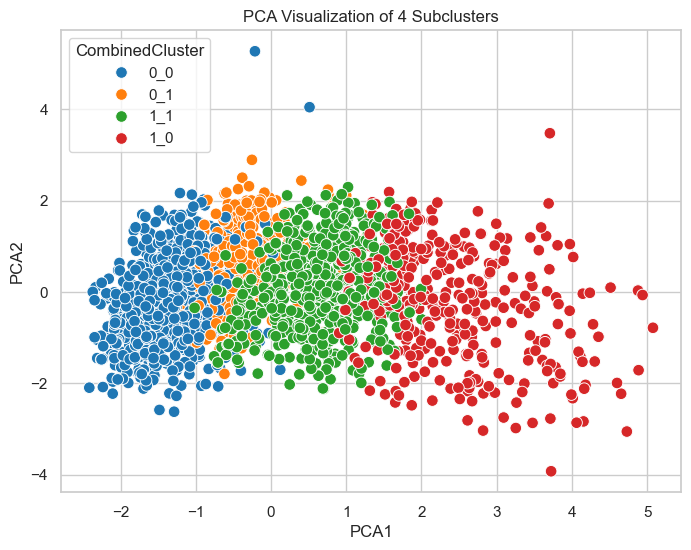

In [497]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['Income','TotalSpend','Recency','CampaignAcceptedCount','Age']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df[features])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
final_df['PCA1'], final_df['PCA2'] = pca_result[:,0], pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=final_df,
    x='PCA1', y='PCA2',
    hue='CombinedCluster',
    palette='tab10',
    s=70
)
plt.title('PCA Visualization of 4 Subclusters')
plt.show()


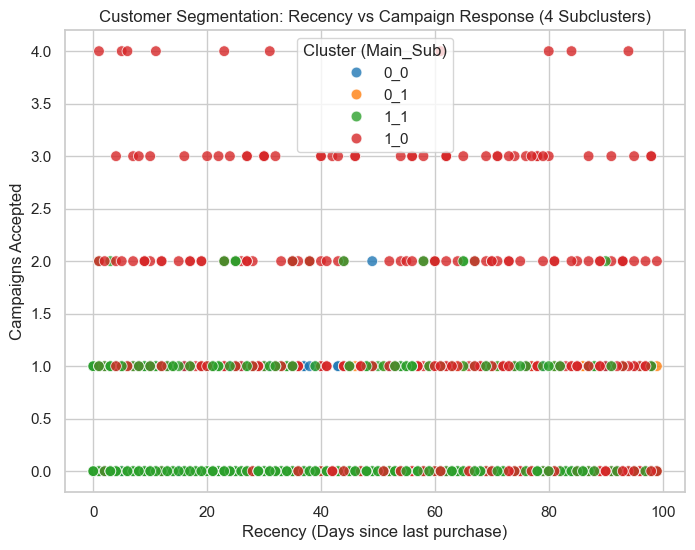

In [498]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=final_df,
    x='Recency', y='CampaignAcceptedCount',
    hue='CombinedCluster',
    palette='tab10',
    alpha=0.8,
    s=60
)
plt.title('Customer Segmentation: Recency vs Campaign Response (4 Subclusters)')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Campaigns Accepted')
plt.legend(title='Cluster (Main_Sub)')
plt.show()


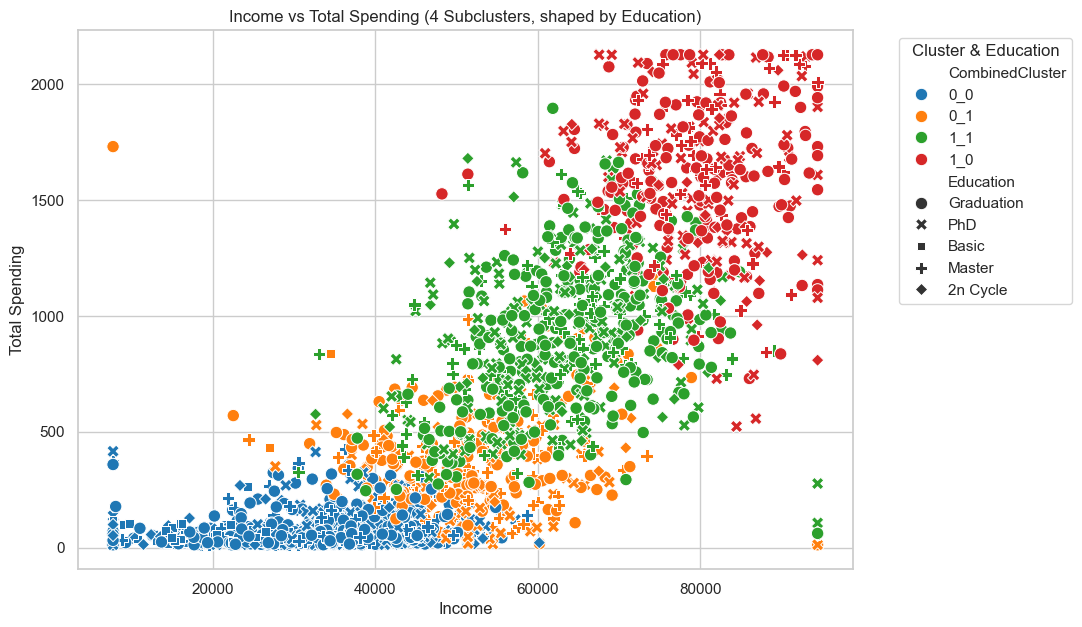

In [499]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=final_df,
    x='Income', y='TotalSpend',
    hue='CombinedCluster',
    style='Education',
    palette='tab10',
    s=80
)
plt.title('Income vs Total Spending (4 Subclusters, shaped by Education)')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.legend(title='Cluster & Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


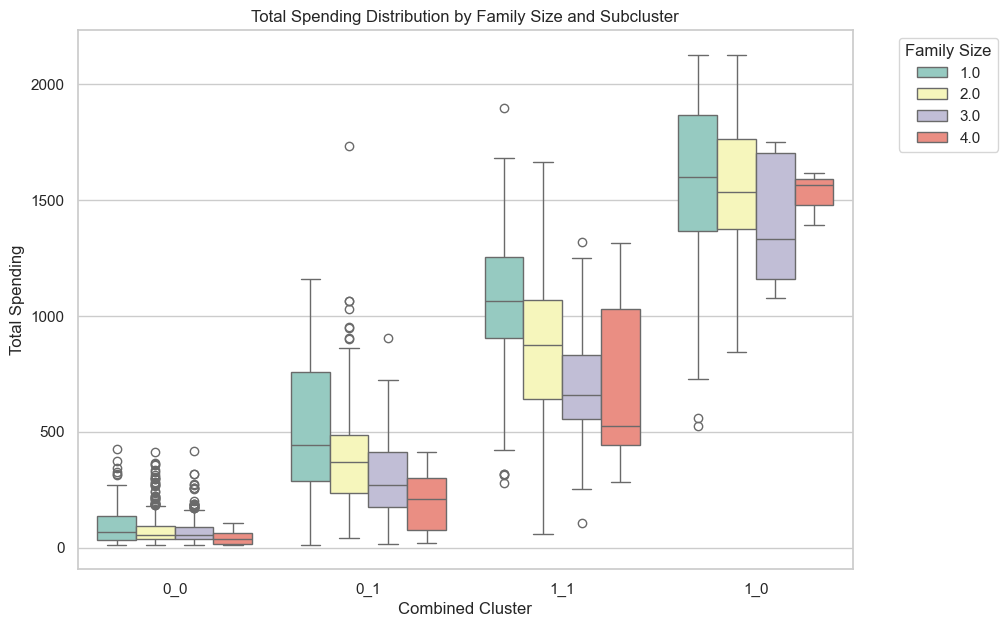

In [500]:
plt.figure(figsize=(10,7))
sns.boxplot(
    data=final_df,
    x='CombinedCluster', y='TotalSpend',
    hue='Family_Size',
    palette='Set3'
)
plt.title('Total Spending Distribution by Family Size and Subcluster')
plt.xlabel('Combined Cluster')
plt.ylabel('Total Spending')
plt.legend(title='Family Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


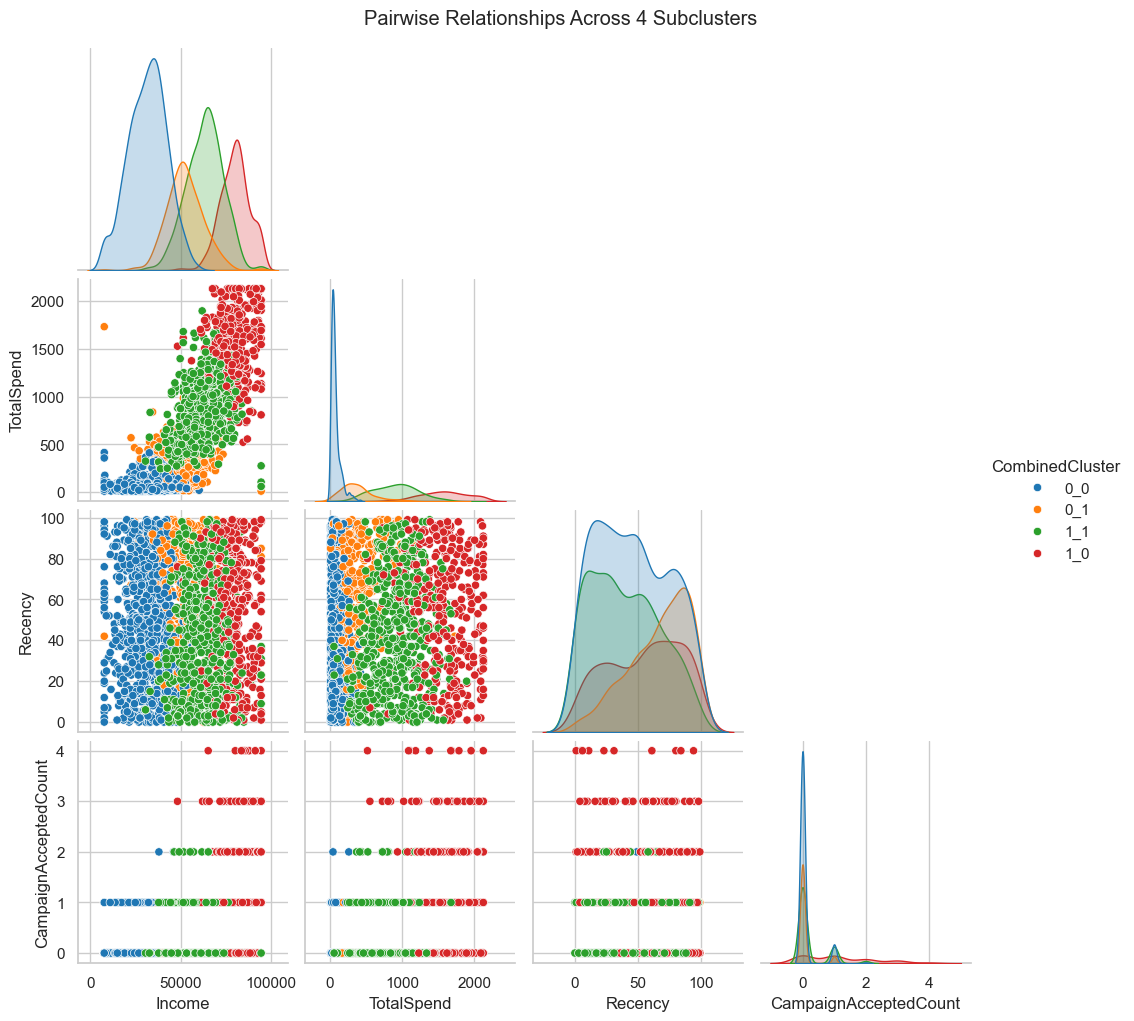

In [504]:
sns.pairplot(
    final_df,
    vars=['Income','TotalSpend','Recency','CampaignAcceptedCount'],
    hue='CombinedCluster',
    palette='tab10',
    corner=True
)
plt.suptitle('Pairwise Relationships Across 4 Subclusters', y=1.02)
plt.show()


In [503]:
import pandas as pd

def print_auto_insights(df):
    print(" --- AUTO INSIGHTS FROM 4 SUBCLUSTERS ---\n")

    # 1️Spending Insights
    spend_summary = df.groupby('CombinedCluster')['TotalSpend'].mean().sort_values(ascending=False)
    print(" Average Spending by Cluster:")
    print(spend_summary, "\n")
    top_spend = spend_summary.idxmax()
    print(f" The highest average spenders belong to cluster '{top_spend}'.\n")

    #  Education & Spending
    edu_spend = df.groupby(['CombinedCluster', 'Education'])['TotalSpend'].mean().unstack().round(2)
    print(" Spending by Education Level (per Cluster):")
    print(edu_spend, "\n")
    for cluster in df['CombinedCluster'].unique():
        best_edu = edu_spend.loc[cluster].idxmax()
        print(f" In cluster {cluster}, {best_edu} customers spend the most.\n")

    # Family Size & Spending
    fam_spend = df.groupby(['CombinedCluster', 'Family_Size'])['TotalSpend'].mean().unstack().round(2)
    print(" Spending by Family Size (per Cluster):")
    print(fam_spend, "\n")
    for cluster in df['CombinedCluster'].unique():
        best_fam = fam_spend.loc[cluster].idxmax()
        print(f" In cluster {cluster}, families of size {best_fam} spend the most.\n")

    # Campaign Response Insights
    camp_response = df.groupby('CombinedCluster')['CampaignAcceptedCount'].mean().round(2)
    print(" Average Campaign Acceptance by Cluster:")
    print(camp_response, "\n")
    top_camp = camp_response.idxmax()
    print(f"The most campaign-responsive customers are in cluster '{top_camp}'.\n")



# Run the insight generator
print_auto_insights(final_df)


 --- AUTO INSIGHTS FROM 4 SUBCLUSTERS ---

 Average Spending by Cluster:
CombinedCluster
1_0    1578.310160
1_1     904.082508
0_1     381.211340
0_0      76.881881
Name: TotalSpend, dtype: float64 

 The highest average spenders belong to cluster '1_0'.

 Spending by Education Level (per Cluster):
Education        2n Cycle   Basic  Graduation   Master      PhD
CombinedCluster                                                
0_0                 67.73   60.46       77.38    84.75    79.92
0_1                339.13  636.50      420.58   349.90   331.67
1_0               1392.57     NaN     1560.02  1696.67  1599.63
1_1                936.00     NaN      901.66   900.54   901.19 

 In cluster 0_0, Master customers spend the most.

 In cluster 0_1, Basic customers spend the most.

 In cluster 1_1, 2n Cycle customers spend the most.

 In cluster 1_0, Master customers spend the most.

 Spending by Family Size (per Cluster):
Family_Size          1.0      2.0      3.0      4.0
CombinedCluster  